# ROSETTA-Ice Airborne Magnetics Data
**Description:**  Magnetic data over the Ross Ice Shelf.

**Dataset:** 

N.A.

**Associated paper:** 

Tinto, K. J., L. Padman, Christine S. Siddoway, S. R. Springer, H. A. Fricker, I. Das, Fabio Caratori-Tontini, et al. “Ross Ice Shelf Response to Climate Driven by the Tectonic Imprint on Seafloor Bathymetry.” Nature Geoscience 12, no. 6 (2019): 441–49. https://doi.org/10.1038/s41561-019-0370-2.


In [2]:
%%capture
%load_ext autoreload
%autoreload 2

import pygmt

from polartoolkit import fetch, maps, regions, utils

In [4]:
df = fetch.rosetta_magnetics()
df.head()

,Line,Latitude,Longitude,UNIXTime,x,y,H_Ell,Mag_anomaly
0,190,-83.752491,-158.170994,1.449017e+09,-252654.473318,-630754.979875,800.525,-34.620186
1,190,-83.752982,-158.177735,1.449017e+09,-252560.394510,-630735.099755,800.456,-33.945927
2,190,-83.753475,-158.184462,1.449017e+09,-252466.379767,-630714.865911,800.371,-33.479530
3,190,-83.753970,-158.191179,1.449017e+09,-252372.387039,-630694.354417,800.281,-33.294969
4,190,-83.754466,-158.197891,1.449017e+09,-252278.409488,-630673.687101,800.253,-33.460298


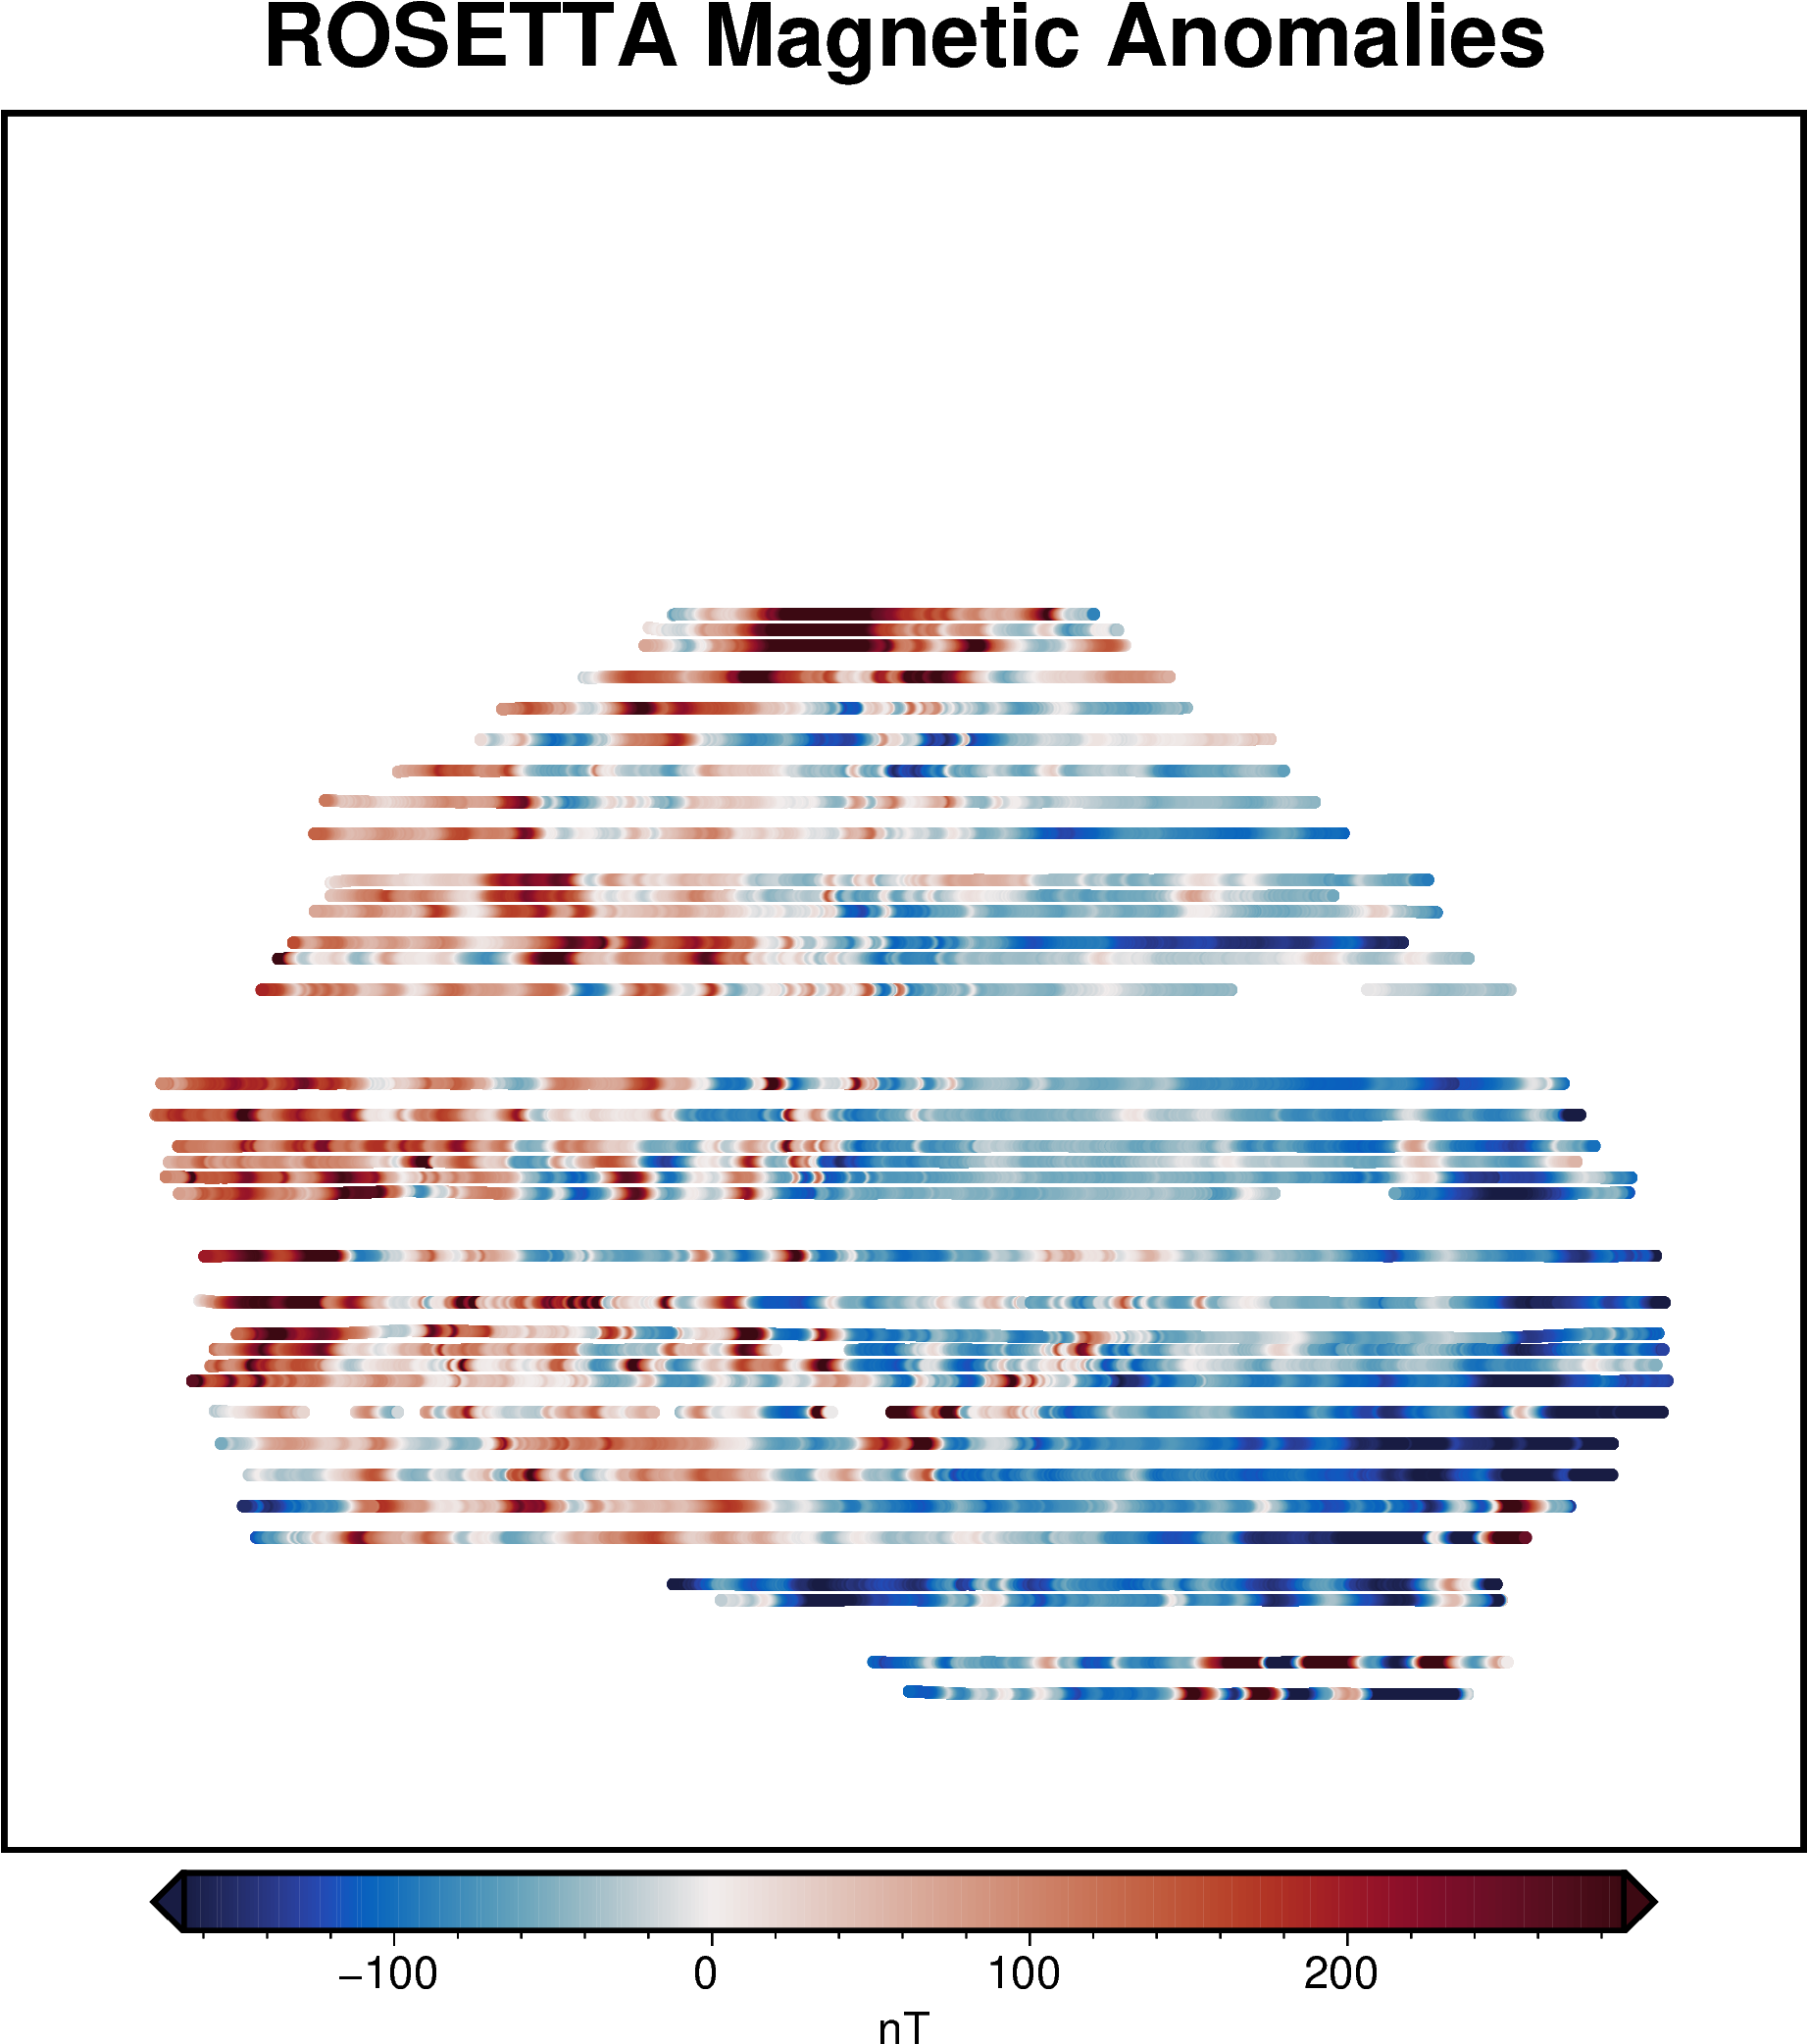

In [9]:
fig = maps.basemap(
    region=regions.ross_ice_shelf,
    hemisphere="south",
    title="ROSETTA Magnetic Anomalies",
)
# make a colorscale
zmin, zmax = utils.get_min_max(df.Mag_anomaly, robust=True)
pygmt.makecpt(cmap="balance+h0", series=[zmin, zmax], background=True)

# plot the points
fig.plot(
    x=df["x"],
    y=df["y"],
    fill=df.Mag_anomaly,
    cmap=True,
    style="c.1c",
)

# add a colorbar
maps.add_colorbar(fig=fig, cbar_label="nT")

fig.show()